# Capstone project: comparing two cities, Torino and Lausanne

# Dependencies

Here we import all the dependencies needed

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

# for importing tables from the Wikipedia page
import pandas as pd
!pip install lxml

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Libraries imported.


# Lausanne analysis

Here we get the coordinates of the city of Lausanne

In [2]:
address = 'Lausanne, Switzerland'

geolocator = Nominatim(user_agent="lau_explorer")
location = geolocator.geocode(address)
latitude_lau = location.latitude
longitude_lau = location.longitude
print('The geograpical coordinate of Lausanne are {}, {}.'.format(latitude_lau, longitude_lau))

The geograpical coordinate of Lausanne are 46.5218269, 6.6327025.


In [3]:
wiki_url = 'https://fr.wikipedia.org/wiki/Liste_des_quartiers_de_Lausanne'
wiki_table = pd.read_html(wiki_url)  

In [4]:
lau_data = pd.DataFrame(wiki_table[0])
lau_data

,no,nom,superficie (ha),nombre d'habitants (2014),secteurs : code - nom - (nombre d'habitants en 2014),situation sur la carte
0,1,Centre,1243,12 753,101 Rue Centrale (2 358) 102 Chauderon (2 148)...,NaN
1,2,Maupas/Valency,803,13 598,201 Maupas (2 758) 202 Av. d’Échallens (3 872)...,NaN
2,3,Sébeillon/Malley,1039,10 322,301 Rue de Morges (3 303) 302 Rue de Sébeillon...,NaN
3,4,Montoie/Bourdonnette,1742,7 573,401 Montoie (3 036) 402 Vallée de la Jeunesse ...,NaN
4,5,Montriond/Cour,1444,8 258,501 Marc-Dufour (2 924) 502 Milan (2) 503 Les ...,NaN
5,6,Sous-Gare/Ouchy,799,10 753,601 Grancy (3 905) 602 Harpe (4 164) 603 Av. d...,NaN
6,7,Montchoisi,524,3 589,701 Montchoisi (3 365) 702 Élysée (224),NaN
7,8,Florimont/Chissiez,466,5 555,801 Florimont (1 893) 802 Av. Rambert (1 126) ...,NaN
8,9,Mousquines/Bellevue,551,2 568,901 Mon-Repos (175) 902 Av. Secrétan (1 731) 9...,NaN
9,10,Vallon/Béthusy,892,6 315,1001 Le Vallon (1 382) 1002 Hôpitaux (274) 100...,NaN


In [5]:
from unicodedata import normalize
temp = pd.Series([],dtype = str)
for i in range(0, len(lau_data["nombre d'habitants (2014)"])):
    normalize('NFKD', lau_data["nombre d'habitants (2014)"][i])
    temp[i] = lau_data["nombre d'habitants (2014)"][i].replace(' ','').replace('\xa0','')

In [6]:
lau_data["nombre d'habitants (2014)"] = temp.astype(float)

To get an idea of the total population and the distribution per quarter, we plot the number of inhabitants per quarter of Lausanne

Text(0.5, 1.0, 'Number of inhabitants in the different quarters of the city of Lausanne')

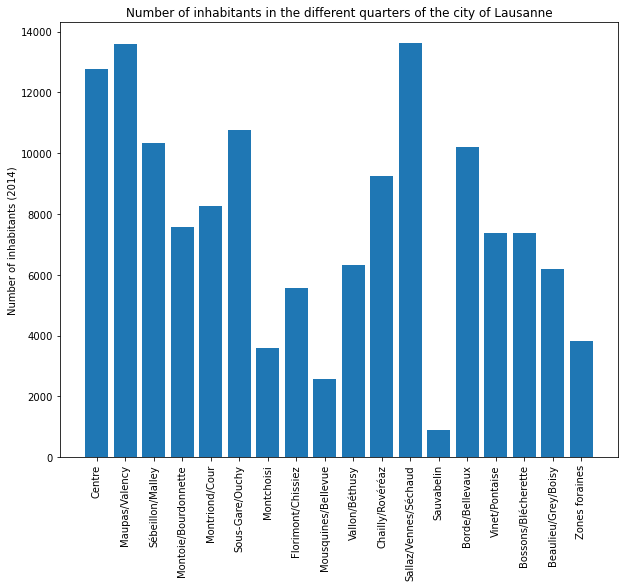

In [7]:
plt.figure(figsize = (10,8))
plt.bar(lau_data['nom'],lau_data["nombre d'habitants (2014)"])
plt.xticks(rotation = 90)
plt.ylabel('Number of inhabitants (2014)')
plt.title('Number of inhabitants in the different quarters of the city of Lausanne')

The total number of inhabitants in Lausanne is: 

In [8]:
tot_laus = lau_data["nombre d'habitants (2014)"].sum()
tot_laus

140023.0

In [9]:
cols = [0,2,3,4,5]

In [10]:
lau_data.drop(lau_data.columns[cols], axis = 1, inplace = True)

In [11]:
lau_data.rename(columns={'nom':'neighbourhoods'}, inplace = True)

In [12]:
lau_data.head()

,neighbourhoods
0,Centre
1,Maupas/Valency
2,Sébeillon/Malley
3,Montoie/Bourdonnette
4,Montriond/Cour


Unfortunately there is not a table listing already the coordinate of the center for each quarter, so the coordinates where added by hand

In [13]:
lau_data['latitude'] = [46.5189,46.5264,46.5236,46.5208,46.5155,46.5069,46.5094,46.5142,46.5186,46.5242,46.5267,46.5378,46.5378,46.5367,46.5269,46.5472,46.5331,46.5622]
lau_data['longitude'] = [6.6358,6.6211,6.6189,6.5958,6.6156,6.6267,6.6353,6.6431,6.6486,6.6486,6.6492,6.6525,6.6383,6.6336,6.6300,6.6150,6.6194,6.6844]

In [14]:
lau_data.head()

,neighbourhoods,latitude,longitude
0,Centre,46.5189,6.6358
1,Maupas/Valency,46.5264,6.6211
2,Sébeillon/Malley,46.5236,6.6189
3,Montoie/Bourdonnette,46.5208,6.5958
4,Montriond/Cour,46.5155,6.6156


Here we show a map of Lausanne and its neighbourhoods

In [15]:
# create map of Lausanne using latitude and longitude values
map_lausanne = folium.Map(location=[latitude_lau, longitude_lau], zoom_start=13)

# add markers to map
for lat, lng, label in zip(lau_data['latitude'], lau_data['longitude'], lau_data['neighbourhoods']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lausanne)  
    
map_lausanne

Now we define the FourSquare credentials to access data about the venues for each neighbourhood

In [16]:
CLIENT_ID = 'CT2L4SYXIDPGMQCYAWJ1KOC2EBNEISGNBUZ2CWFD5MYQXKJ5' # your Foursquare ID
CLIENT_SECRET = 'GGLIFFLM5CBWUYF3KUITLIQHJRDYHZRGNMUFSDMCM2PYWG1W' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CT2L4SYXIDPGMQCYAWJ1KOC2EBNEISGNBUZ2CWFD5MYQXKJ5
CLIENT_SECRET:GGLIFFLM5CBWUYF3KUITLIQHJRDYHZRGNMUFSDMCM2PYWG1W


Here we access information about venues in a radius of 5 km around the city centre of Lausanne

In [17]:
radius = 5000
LIMIT = 150
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET,latitude_lau, longitude_lau, VERSION, radius, LIMIT)
results = requests.get(url).json()

In [18]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [19]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

In [20]:
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


Here we take the results obtained about the venues, we calculate the frequency per venue type and we take the first 10 venue types

In [21]:
centre_laus_freq = nearby_venues.groupby('categories').count().sort_values('name',ascending = False).iloc[0:10,0]

Text(0.5, 1.0, 'Number of venues and their type in a radius of 5 km from the city centre of Lausanne')

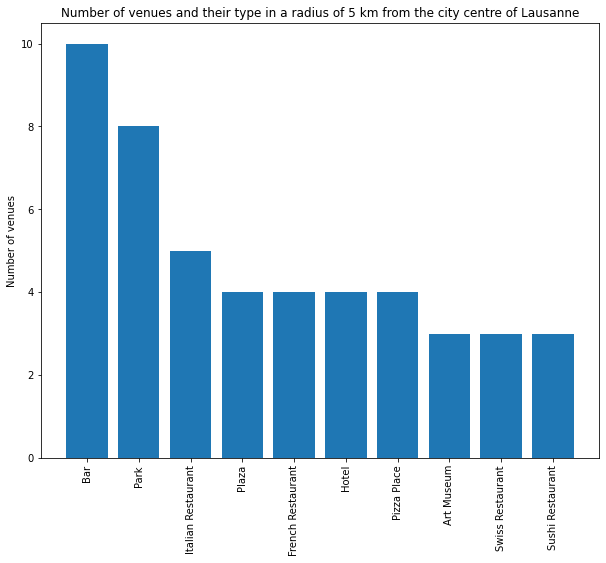

In [22]:
plt.figure(figsize = (10,8))
plt.bar(centre_laus_freq.index,centre_laus_freq)
plt.xticks(rotation = 90)
plt.ylabel('Number of venues')
plt.title('Number of venues and their type in a radius of 5 km from the city centre of Lausanne')

Now we run the same function for all the neighbourhoods in Lausanne

In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        print(radius)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
lausanne_venues = getNearbyVenues(names=lau_data['neighbourhoods'],
                                   latitudes=lau_data['latitude'],
                                   longitudes=lau_data['longitude']
                                  )

Centre
500
Maupas/Valency
500
Sébeillon/Malley
500
Montoie/Bourdonnette
500
Montriond/Cour
500
Sous-Gare/Ouchy
500
Montchoisi
500
Florimont/Chissiez
500
Mousquines/Bellevue
500
Vallon/Béthusy
500
Chailly/Rovéréaz
500
Sallaz/Vennes/Séchaud
500
Sauvabelin
500
Borde/Bellevaux
500
Vinet/Pontaise
500
Bossons/Blécherette
500
Beaulieu/Grey/Boisy
500
Zones foraines
500


In [26]:
print(lausanne_venues.shape)
lausanne_venues.head()

(306, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Centre,46.5189,6.6358,Au Chat Noir,46.517539,6.637225,French Restaurant
1,Centre,46.5189,6.6358,Bar Tabac,46.518066,6.634775,Bar
2,Centre,46.5189,6.6358,Luigia,46.519622,6.637160,Restaurant
3,Centre,46.5189,6.6358,Chez Mario,46.520007,6.636311,Italian Restaurant
4,Centre,46.5189,6.6358,Café des Artisans,46.520971,6.634413,Bar


In [27]:
lausanne_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Beaulieu/Grey/Boisy,10,10,10,10,10,10
Borde/Bellevaux,7,7,7,7,7,7
Bossons/Blécherette,1,1,1,1,1,1
Centre,54,54,54,54,54,54
Chailly/Rovéréaz,4,4,4,4,4,4
Florimont/Chissiez,4,4,4,4,4,4
Maupas/Valency,28,28,28,28,28,28
Montchoisi,20,20,20,20,20,20
Montoie/Bourdonnette,5,5,5,5,5,5


In [28]:
lausanne_venues.groupby('Neighbourhood').count().sum()

Neighbourhood Latitude     306
Neighbourhood Longitude    306
Venue                      306
Venue Latitude             306
Venue Longitude            306
Venue Category             306
dtype: int64

Text(0.5, 1.0, 'Number of venues in the different quarters of the city of Lausanne')

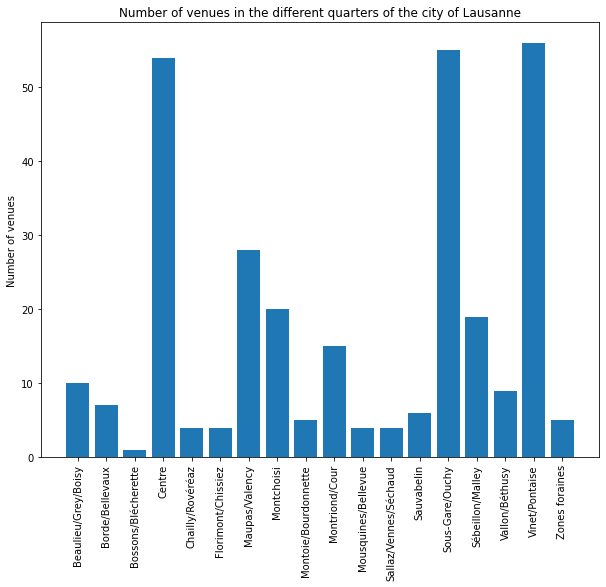

In [29]:
plt.figure(figsize = (10,8))
plt.bar(lausanne_venues.groupby('Neighbourhood').count().index,lausanne_venues.groupby('Neighbourhood').count()['Venue'])
plt.xticks(rotation = 90)
plt.ylabel('Number of venues')
plt.title('Number of venues in the different quarters of the city of Lausanne')

In [30]:
# one hot encoding
lausanne_onehot = pd.get_dummies(lausanne_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
lausanne_onehot['Neighbourhood'] = lausanne_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [lausanne_onehot.columns[-1]] + list(lausanne_onehot.columns[:-1])
lausanne_onehot = lausanne_onehot[fixed_columns]

lausanne_onehot.head()

,Neighbourhood,Accessories Store,Arcade,Art Museum,Asian Restaurant,Bakery,Bar,Beach,Bed & Breakfast,Beer Garden,Bistro,Boat or Ferry,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Bus Station,Bus Stop,Café,Candy Store,Chinese Restaurant,Church,Cocktail Bar,Coffee Shop,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Department Store,Dessert Shop,Diner,Ethiopian Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Food Court,French Restaurant,Furniture / Home Store,Gas Station,Grocery Store,Gym,Harbor / Marina,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Lake,Mediterranean Restaurant,Metro Station,Middle Eastern Restaurant,Modern European Restaurant,Museum,Nightclub,Paper / Office Supplies Store,Park,Pedestrian Plaza,Pier,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Restaurant,Rock Club,Sandwich Place,Scenic Lookout,Skate Park,Skating Rink,Snack Place,Spa,Sporting Goods Shop,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Track,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Wine Bar,Yoga Studio
0,Centre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Centre,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Centre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Centre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Centre,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
#lausanne_grouped = lausanne_onehot.groupby('Neighbourhood').mean().reset_index()
lausanne_grouped = lausanne_onehot.groupby('Neighbourhood').sum().reset_index()

In [32]:
lausanne_grouped.head()

,Neighbourhood,Accessories Store,Arcade,Art Museum,Asian Restaurant,Bakery,Bar,Beach,Bed & Breakfast,Beer Garden,Bistro,Boat or Ferry,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Bus Station,Bus Stop,Café,Candy Store,Chinese Restaurant,Church,Cocktail Bar,Coffee Shop,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Department Store,Dessert Shop,Diner,Ethiopian Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Food Court,French Restaurant,Furniture / Home Store,Gas Station,Grocery Store,Gym,Harbor / Marina,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Lake,Mediterranean Restaurant,Metro Station,Middle Eastern Restaurant,Modern European Restaurant,Museum,Nightclub,Paper / Office Supplies Store,Park,Pedestrian Plaza,Pier,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Restaurant,Rock Club,Sandwich Place,Scenic Lookout,Skate Park,Skating Rink,Snack Place,Spa,Sporting Goods Shop,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Track,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Wine Bar,Yoga Studio
0,Beaulieu/Grey/Boisy,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Borde/Bellevaux,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Bossons/Blécherette,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Centre,0,0,0,0,0,10,0,0,0,0,0,1,0,1,0,0,1,0,2,1,1,1,0,1,0,0,1,1,1,1,1,0,1,0,0,0,0,5,0,0,0,1,0,0,0,0,2,0,1,0,3,1,0,0,0,0,1,1,0,1,0,0,1,0,1,0,2,1,0,2,1,1,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Chailly/Rovéréaz,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
lausanne_grouped.shape

(18, 97)

In [34]:
num_top_venues = 5

for hood in lausanne_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = lausanne_grouped[lausanne_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Beaulieu/Grey/Boisy----
               venue  freq
0           Bus Stop   2.0
1              Diner   1.0
2        Pizza Place   1.0
3             Bakery   1.0
4  Convenience Store   1.0


----Borde/Bellevaux----
              venue  freq
0    Scenic Lookout   1.0
1  Swiss Restaurant   1.0
2            Bakery   1.0
3              Lake   1.0
4     Grocery Store   1.0


----Bossons/Blécherette----
                 venue  freq
0       Cosmetics Shop   1.0
1  Indie Movie Theater   0.0
2       Sandwich Place   0.0
3            Rock Club   0.0
4           Restaurant   0.0


----Centre----
                venue  freq
0                 Bar  10.0
1   French Restaurant   5.0
2  Italian Restaurant   3.0
3          Restaurant   2.0
4    Swiss Restaurant   2.0


----Chailly/Rovéréaz----
              venue  freq
0              Park   1.0
1  Department Store   1.0
2       Supermarket   1.0
3  Sushi Restaurant   1.0
4  Pedestrian Plaza   0.0


----Florimont/Chissiez----
                       venu

Let's define a function that assembles in a dataframe the most common venues

In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [36]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = lausanne_grouped['Neighbourhood']

for ind in np.arange(lausanne_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(lausanne_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(18)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beaulieu/Grey/Boisy,Bus Stop,Supermarket,Chinese Restaurant,Bakery,Grocery Store,Pizza Place,Diner,Stadium,Convenience Store,Yoga Studio
1,Borde/Bellevaux,Swiss Restaurant,Supermarket,Grocery Store,Bakery,Scenic Lookout,Lake,Park,Cosmetics Shop,Creperie,Cupcake Shop
2,Bossons/Blécherette,Cosmetics Shop,Yoga Studio,Wine Bar,Creperie,Cupcake Shop,Department Store,Dessert Shop,Diner,Ethiopian Restaurant,Falafel Restaurant
3,Centre,Bar,French Restaurant,Italian Restaurant,Plaza,Hotel,Café,Restaurant,Swiss Restaurant,Middle Eastern Restaurant,Pizza Place
4,Chailly/Rovéréaz,Department Store,Park,Supermarket,Sushi Restaurant,Yoga Studio,Falafel Restaurant,Cosmetics Shop,Creperie,Cupcake Shop,Dessert Shop
5,Florimont/Chissiez,Bakery,Gas Station,Middle Eastern Restaurant,Bus Station,Yoga Studio,Fast Food Restaurant,Creperie,Cupcake Shop,Department Store,Dessert Shop
6,Maupas/Valency,Italian Restaurant,Theater,Nightclub,Bus Stop,Sushi Restaurant,Restaurant,Steakhouse,Furniture / Home Store,Hotel,Food & Drink Shop
7,Montchoisi,Café,Restaurant,Burger Joint,Gas Station,Hotel,Japanese Restaurant,Lake,Museum,Park,Plaza
8,Montoie/Bourdonnette,Hostel,History Museum,Beach,Bowling Alley,Yoga Studio,Fast Food Restaurant,Creperie,Cupcake Shop,Department Store,Dessert Shop
9,Montriond/Cour,Hotel,Bus Stop,Restaurant,Tennis Court,Park,Pizza Place,Pool,Bus Station,Supermarket,Gym


Run K mean to group quarters into clusters

In [37]:
# set number of clusters
kclusters = 3

lausanne_grouped_clustering = lausanne_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(lausanne_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int32)

In [38]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

lausanne_merged = lau_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
lausanne_merged = lausanne_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='neighbourhoods')

lausanne_merged.head(18) # check the last columns!

,neighbourhoods,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Centre,46.5189,6.6358,1,Bar,French Restaurant,Italian Restaurant,Plaza,Hotel,Café,Restaurant,Swiss Restaurant,Middle Eastern Restaurant,Pizza Place
1,Maupas/Valency,46.5264,6.6211,0,Italian Restaurant,Theater,Nightclub,Bus Stop,Sushi Restaurant,Restaurant,Steakhouse,Furniture / Home Store,Hotel,Food & Drink Shop
2,Sébeillon/Malley,46.5236,6.6189,0,Grocery Store,Sushi Restaurant,Furniture / Home Store,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Nightclub,Paper / Office Supplies Store,Pizza Place,Bus Stop
3,Montoie/Bourdonnette,46.5208,6.5958,0,Hostel,History Museum,Beach,Bowling Alley,Yoga Studio,Fast Food Restaurant,Creperie,Cupcake Shop,Department Store,Dessert Shop
4,Montriond/Cour,46.5155,6.6156,0,Hotel,Bus Stop,Restaurant,Tennis Court,Park,Pizza Place,Pool,Bus Station,Supermarket,Gym
5,Sous-Gare/Ouchy,46.5069,6.6267,2,Hotel,Restaurant,Plaza,Café,Bar,Japanese Restaurant,Italian Restaurant,Hotel Bar,Grocery Store,Waterfront
6,Montchoisi,46.5094,6.6353,0,Café,Restaurant,Burger Joint,Gas Station,Hotel,Japanese Restaurant,Lake,Museum,Park,Plaza
7,Florimont/Chissiez,46.5142,6.6431,0,Bakery,Gas Station,Middle Eastern Restaurant,Bus Station,Yoga Studio,Fast Food Restaurant,Creperie,Cupcake Shop,Department Store,Dessert Shop
8,Mousquines/Bellevue,46.5186,6.6486,0,Bakery,Snack Place,Diner,Park,Yoga Studio,Fast Food Restaurant,Creperie,Cupcake Shop,Department Store,Dessert Shop
9,Vallon/Béthusy,46.5242,6.6486,0,Bakery,Bus Station,Sushi Restaurant,Department Store,Park,Fast Food Restaurant,Supermarket,Yoga Studio,Creperie,Cupcake Shop


Let's create a map to show the clusters

In [39]:
# create map
map_clusters = folium.Map(location=[latitude_lau, longitude_lau], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(lausanne_merged['latitude'], lausanne_merged['longitude'], lausanne_merged['neighbourhoods'], lausanne_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Torino analysis

Here we get the coordinates of the city of Torino

In [40]:
address = 'Torino, Italy'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude_to = location.latitude
longitude_to = location.longitude
print('The geograpical coordinate of Torino are {}, {}.'.format(latitude_to, longitude_to))

The geograpical coordinate of Torino are 45.0677551, 7.6824892.


Here we get the list of Torino's quarters from the Wikipedia page and we clean the dataframe from unnecessary information. I decided to keep group information about the quarters at a higher level, chosing the administrative grouping called "circoscrizione" that is an ensemble of multiple quarters


In [41]:
wiki_url = "https://it.wikipedia.org/wiki/Circoscrizioni_di_Torino"
wiki_table = pd.read_html(wiki_url)  

In [42]:
to_data = pd.DataFrame(wiki_table[0])
to_data.head()

,Circoscrizione,Stemma,Residenti (2011)[3],Superficie,Quartieri
0,Circoscrizione 1,NaN,78.523 ab.,"7,006 km²","Centro(Quadrilatero Romano, Borgo Nuovo, Porta..."
1,Circoscrizione 2[4],NaN,141.344 ab.,"18,818 km²","Santa Rita Mirafiori Nord(Borgo Cina, Città Gi..."
2,Circoscrizione 3,NaN,130.709 ab.,"8,623 km²",Borgo San Paolo(Rione Lancia) Cenisia Pozzo St...
3,Circoscrizione 4,NaN,98.787 ab.,"9,183 km²",San Donato Campidoglio Parella
4,Circoscrizione 5,NaN,126.666 ab.,"15,583 km²",Borgo Vittoria(Borgata Tesso) Madonna di Campa...


In [43]:
cols = [1,2,3,4]

In [44]:
to_data.drop(to_data.columns[cols], axis = 1, inplace = True)

In [45]:
to_data.head()

,Circoscrizione
0,Circoscrizione 1
1,Circoscrizione 2[4]
2,Circoscrizione 3
3,Circoscrizione 4
4,Circoscrizione 5


In [46]:
to_data['Circoscrizione'][1] = 'Circoscrizione 2'
to_data['Circoscrizione'][7] = 'Circoscrizione 8'

In [47]:
from unicodedata import normalize
temp = pd.Series([],dtype = str)

for i in range(0, len(pd.DataFrame(wiki_table[0])["Residenti (2011)[3]"])):
    normalize('NFKD', pd.DataFrame(wiki_table[0])["Residenti (2011)[3]"][i])
    temp[i] = pd.DataFrame(wiki_table[0])["Residenti (2011)[3]"][i].replace(' ab.','').replace('.','')
    
pd.DataFrame(wiki_table[0])["Residenti (2011)[3]"] = temp.astype(float)

To get an idea of the total population and the distribution per quarter, we plot the number of inhabitants per quarter of Torino

Text(0.5, 1.0, 'Number of inhabitants in the different quarters of the city of Torino')

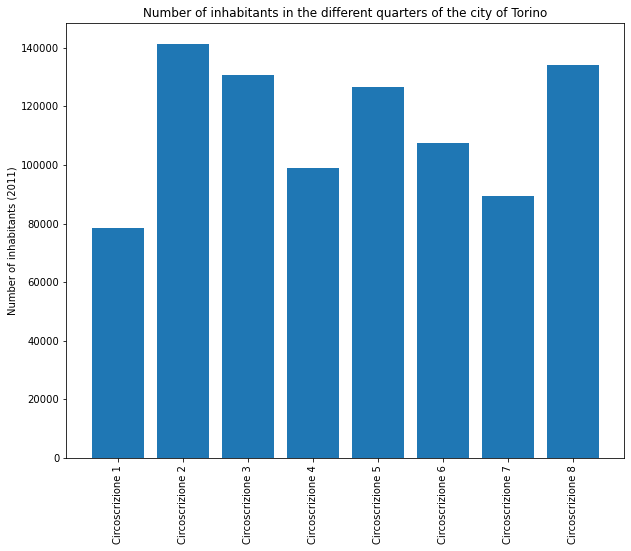

In [48]:
plt.figure(figsize = (10,8))
plt.bar(to_data['Circoscrizione'],pd.DataFrame(wiki_table[0])["Residenti (2011)[3]"] )
plt.xticks(rotation = 90)
plt.ylabel('Number of inhabitants (2011)')
plt.title('Number of inhabitants in the different quarters of the city of Torino')

The total number of inhabitants in Torino is:

In [49]:
tot_torino = pd.DataFrame(wiki_table[0])["Residenti (2011)[3]"].sum() 
tot_torino

906874.0

Unfortunately there is not a table listing already the coordinate of the center for each quarter, so the coordinates where added by hand

In [50]:
to_data['latitude'] = [45.070203,45.033970,45.064219,45.079942,45.102908,45.110617,45.092651,45.026379]
to_data['longitude'] = [7.676228,7.620971,7.636010,7.641316,7.649016,7.705603,7.726734,7.665784]

In [51]:
to_data.rename(columns={'Circoscrizione':'neighbourhoods'}, inplace = True)
to_data.head()

,neighbourhoods,latitude,longitude
0,Circoscrizione 1,45.070203,7.676228
1,Circoscrizione 2,45.033970,7.620971
2,Circoscrizione 3,45.064219,7.636010
3,Circoscrizione 4,45.079942,7.641316
4,Circoscrizione 5,45.102908,7.649016


Here we show a map of Torino and its neighbourhoods

In [52]:
# create map of Lausanne using latitude and longitude values
map_to = folium.Map(location=[latitude_to, longitude_to], zoom_start=12)

# add markers to map
for lat, lng, label in zip(to_data['latitude'], to_data['longitude'], to_data['neighbourhoods']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_to)  
    
map_to

Here we access information about venues in a radius of 7 km m around the centre of Torino

In [53]:
radius = 7000
LIMIT = 150
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_to, longitude_to, VERSION, radius, LIMIT)
results = requests.get(url).json()

In [54]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


Here we take the results obtained about the venues, we calculate the frequency per venue type and we take the first 10 venue types

In [55]:
centre_to_freq = nearby_venues.groupby('categories').count().sort_values('name',ascending = False).iloc[0:10,0]

Text(0.5, 1.0, 'Number of venues and their type in a radius of 7 km from the city centre of Torino')

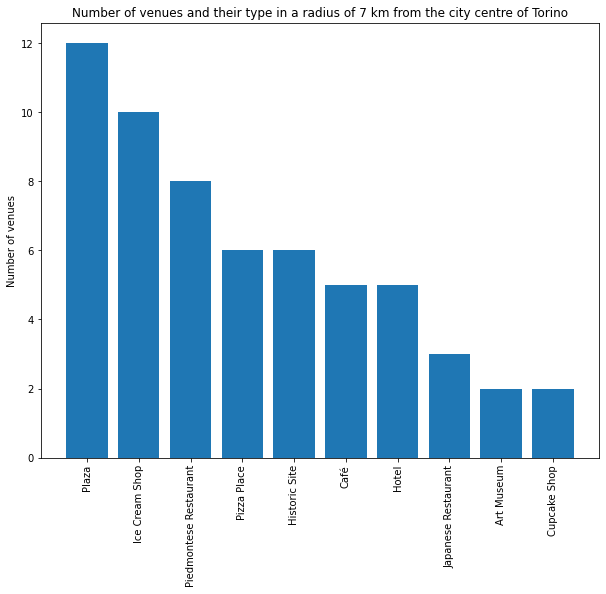

In [56]:
plt.figure(figsize = (10,8))
plt.bar(centre_to_freq.index,centre_to_freq)
plt.xticks(rotation = 90)
plt.ylabel('Number of venues')
plt.title('Number of venues and their type in a radius of 7 km from the city centre of Torino')

Now we run the same function for all the neighbourhoods in Torino

In [57]:
torino_venues = getNearbyVenues(names=to_data['neighbourhoods'],
                                   latitudes=to_data['latitude'],
                                   longitudes=to_data['longitude']
                                  )

Circoscrizione 1
500
Circoscrizione 2
500
Circoscrizione 3
500
Circoscrizione 4
500
Circoscrizione 5
500
Circoscrizione 6
500
Circoscrizione 7
500
Circoscrizione 8
500


In [58]:
print(torino_venues.shape)
torino_venues.head()

(128, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Circoscrizione 1,45.070203,7.676228,È Cucina,45.071119,7.678142,Italian Restaurant
1,Circoscrizione 1,45.070203,7.676228,Piazza Solferino,45.069025,7.676922,Plaza
2,Circoscrizione 1,45.070203,7.676228,M** Bun,45.071540,7.674685,Burger Joint
3,Circoscrizione 1,45.070203,7.676228,Ristorante Solferino,45.069850,7.678100,Piedmontese Restaurant
4,Circoscrizione 1,45.070203,7.676228,Ristorante Consorzio,45.071560,7.679252,Piedmontese Restaurant


In [59]:
torino_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Circoscrizione 1,79,79,79,79,79,79
Circoscrizione 2,10,10,10,10,10,10
Circoscrizione 3,11,11,11,11,11,11
Circoscrizione 4,11,11,11,11,11,11
Circoscrizione 5,4,4,4,4,4,4
Circoscrizione 6,6,6,6,6,6,6
Circoscrizione 7,1,1,1,1,1,1
Circoscrizione 8,6,6,6,6,6,6


In [60]:
torino_venues.groupby('Neighbourhood').count().sum()

Neighbourhood Latitude     128
Neighbourhood Longitude    128
Venue                      128
Venue Latitude             128
Venue Longitude            128
Venue Category             128
dtype: int64

Text(0.5, 1.0, 'Number of venues in the different quarters of the city of Torino')

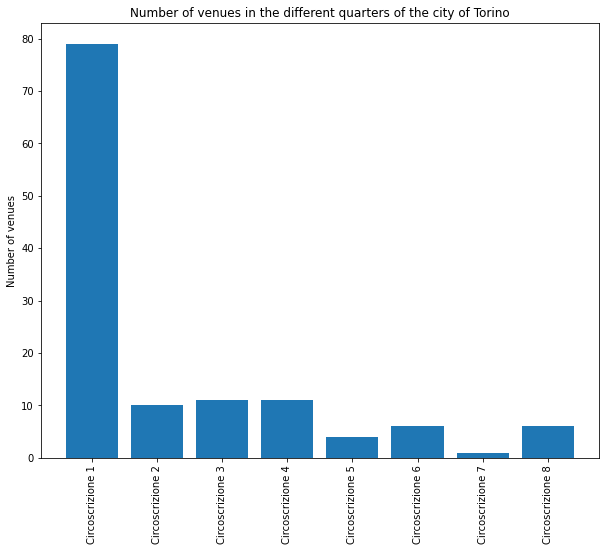

In [61]:
plt.figure(figsize = (10,8))
plt.bar(torino_venues.groupby('Neighbourhood').count().index,torino_venues.groupby('Neighbourhood').count()['Venue'])
plt.xticks(rotation = 90)
plt.ylabel('Number of venues')
plt.title('Number of venues in the different quarters of the city of Torino')

In [62]:
# one hot encoding
torino_onehot = pd.get_dummies(torino_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
torino_onehot['Neighbourhood'] = torino_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [torino_onehot.columns[-1]] + list(torino_onehot.columns[:-1])
torino_onehot = torino_onehot[fixed_columns]
torino_onehot.head()

,Neighbourhood,Argentinian Restaurant,Auditorium,Bakery,Bar,Bistro,Bookstore,Boutique,Breakfast Spot,Building,Burger Joint,Bus Station,Bus Stop,Café,Chinese Restaurant,Cocktail Bar,Coffee Shop,Comic Shop,Cosmetics Shop,Cupcake Shop,Furniture / Home Store,Garden,Gastropub,German Restaurant,Gift Shop,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Health Food Store,Hobby Shop,Hotel,Hotel Pool,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Market,Mattress Store,Mexican Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Pet Store,Piadineria,Piedmontese Restaurant,Pizza Place,Plaza,Pub,Restaurant,Sandwich Place,Seafood Restaurant,Skating Rink,Soup Place,Steakhouse,Supermarket,Sushi Restaurant,Theater,Trattoria/Osteria,Vegetarian / Vegan Restaurant,Wine Shop
0,Circoscrizione 1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Circoscrizione 1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Circoscrizione 1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Circoscrizione 1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Circoscrizione 1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
torino_grouped = torino_onehot.groupby('Neighbourhood').sum().reset_index()

In [64]:
torino_grouped.head()

,Neighbourhood,Argentinian Restaurant,Auditorium,Bakery,Bar,Bistro,Bookstore,Boutique,Breakfast Spot,Building,Burger Joint,Bus Station,Bus Stop,Café,Chinese Restaurant,Cocktail Bar,Coffee Shop,Comic Shop,Cosmetics Shop,Cupcake Shop,Furniture / Home Store,Garden,Gastropub,German Restaurant,Gift Shop,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Health Food Store,Hobby Shop,Hotel,Hotel Pool,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Market,Mattress Store,Mexican Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Pet Store,Piadineria,Piedmontese Restaurant,Pizza Place,Plaza,Pub,Restaurant,Sandwich Place,Seafood Restaurant,Skating Rink,Soup Place,Steakhouse,Supermarket,Sushi Restaurant,Theater,Trattoria/Osteria,Vegetarian / Vegan Restaurant,Wine Shop
0,Circoscrizione 1,1,0,1,2,2,2,1,0,1,2,1,0,6,0,1,2,0,2,1,0,1,0,1,3,1,0,1,1,1,0,1,0,2,7,2,2,1,1,0,1,1,0,1,1,0,1,4,4,2,1,1,1,4,0,1,1,0,2,1,0,1,1
1,Circoscrizione 2,0,0,0,0,0,0,0,0,0,0,0,0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Circoscrizione 3,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,1,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Circoscrizione 4,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,Circoscrizione 5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [65]:
torino_grouped.shape

(8, 63)

In [66]:
num_top_venues = 5

for hood in torino_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = torino_grouped[torino_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Circoscrizione 1----
                    venue  freq
0      Italian Restaurant   7.0
1                    Café   6.0
2  Piedmontese Restaurant   4.0
3             Pizza Place   4.0
4      Seafood Restaurant   4.0


----Circoscrizione 2----
                  venue  freq
0                  Café   5.0
1                 Plaza   1.0
2  Gym / Fitness Center   1.0
3    Chinese Restaurant   1.0
4                  Park   1.0


----Circoscrizione 3----
                venue  freq
0         Pizza Place   2.0
1  Italian Restaurant   2.0
2       Grocery Store   1.0
3                Park   1.0
4  Chinese Restaurant   1.0


----Circoscrizione 4----
                venue  freq
0                Café   2.0
1          Comic Shop   1.0
2      Sandwich Place   1.0
3         Pizza Place   1.0
4  Italian Restaurant   1.0


----Circoscrizione 5----
                    venue  freq
0  Furniture / Home Store   1.0
1             Coffee Shop   1.0
2                    Café   1.0
3          Sandwich Place   1.0

In [67]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = torino_grouped['Neighbourhood']

for ind in np.arange(torino_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(torino_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Circoscrizione 1,Italian Restaurant,Café,Piedmontese Restaurant,Pizza Place,Seafood Restaurant,Gift Shop,Bookstore,Bistro,Japanese Restaurant,Sushi Restaurant
1,Circoscrizione 2,Café,Gym / Fitness Center,Chinese Restaurant,Italian Restaurant,Plaza,Park,Garden,Cupcake Shop,Furniture / Home Store,Gastropub
2,Circoscrizione 3,Italian Restaurant,Pizza Place,Chinese Restaurant,Café,Piedmontese Restaurant,Park,Supermarket,Grocery Store,Hobby Shop,Gift Shop
3,Circoscrizione 4,Café,Italian Restaurant,Comic Shop,Pizza Place,Plaza,Sandwich Place,Park,Pet Store,Gastropub,Trattoria/Osteria
4,Circoscrizione 5,Coffee Shop,Sandwich Place,Furniture / Home Store,Café,Wine Shop,Gym / Fitness Center,Gym,Grocery Store,Gourmet Shop,Gift Shop


In [68]:
# set number of clusters
kclusters = 3

torino_grouped_clustering = torino_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(torino_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 2, 0, 0, 0, 0, 0, 0], dtype=int32)

In [69]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

torino_merged = to_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
torino_merged = torino_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='neighbourhoods')

torino_merged.head(8) # check the last columns!

,neighbourhoods,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Circoscrizione 1,45.070203,7.676228,1,Italian Restaurant,Café,Piedmontese Restaurant,Pizza Place,Seafood Restaurant,Gift Shop,Bookstore,Bistro,Japanese Restaurant,Sushi Restaurant
1,Circoscrizione 2,45.033970,7.620971,2,Café,Gym / Fitness Center,Chinese Restaurant,Italian Restaurant,Plaza,Park,Garden,Cupcake Shop,Furniture / Home Store,Gastropub
2,Circoscrizione 3,45.064219,7.636010,0,Italian Restaurant,Pizza Place,Chinese Restaurant,Café,Piedmontese Restaurant,Park,Supermarket,Grocery Store,Hobby Shop,Gift Shop
3,Circoscrizione 4,45.079942,7.641316,0,Café,Italian Restaurant,Comic Shop,Pizza Place,Plaza,Sandwich Place,Park,Pet Store,Gastropub,Trattoria/Osteria
4,Circoscrizione 5,45.102908,7.649016,0,Coffee Shop,Sandwich Place,Furniture / Home Store,Café,Wine Shop,Gym / Fitness Center,Gym,Grocery Store,Gourmet Shop,Gift Shop
5,Circoscrizione 6,45.110617,7.705603,0,Hotel,Mattress Store,Café,Bus Stop,Breakfast Spot,Hotel Pool,Grocery Store,Gourmet Shop,Gift Shop,Cosmetics Shop
6,Circoscrizione 7,45.092651,7.726734,0,Trattoria/Osteria,Wine Shop,Cocktail Bar,Gym / Fitness Center,Gym,Grocery Store,Gourmet Shop,Gift Shop,German Restaurant,Gastropub
7,Circoscrizione 8,45.026379,7.665784,0,Skating Rink,Hobby Shop,Auditorium,Supermarket,Pizza Place,Gastropub,Cosmetics Shop,Cupcake Shop,Furniture / Home Store,Garden


In [70]:
# create map
map_clusters = folium.Map(location=[latitude_to, longitude_to], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(torino_merged['latitude'], torino_merged['longitude'], torino_merged['neighbourhoods'], torino_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters